## Data Mining Individual Assignment
By Johan Bender Koch

Questions for data set:

- K-Means Analysis: What are the two groupings of data in terms of height and shoe size?
- Aprori Algorithm: What are the programming languages that often appear together?
- Desicion Tree: What are the best questions to ask to identify a female student?


In [2]:
#load libraries for data analysis
import numpy as np
import pandas as pd
import collections 
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import random
from collections import defaultdict
from collections import Counter
import math
import itertools

In [3]:
# Load data
df = pd.read_csv("/Users/Bender/OneDrive /ITU/2ndsemester/Data Mining/Personal Hand-in/Data Mining - Spring 2017.csv")

In [4]:
df.head()

,Timestamp,Age,Gender,Shoe Size,Height,What degree are you studying?,Why are you taking this course?,Which programming languages do you know?,Which phone OS do you prefer?,Which topics would you prefer to learn in this course? [Design efficient databases for large amounts of data],...,In which order do you normally traverse these ITU locations? [14 checkpoint],In which order do you normally traverse these ITU locations? [15 checkpoint],Write four (4) random numbers between 0 and 15,therb fortt glag,Pick a number,Favorite film?,Favorite TV-Show,Favorite Game,Which row are you sitting/did you sit in during the introduction lecture?,Which seat are you sitting/did you sit on during the introduction lecture?
0,2017/01/29 4:06:18 PM CET,34,male,34,34,GAMES-A,It may help me to find a job,34,iOS,Not interested,...,Basement,Basement,344,NaN,7,sdf,sdf,sdf,A,3
1,2017/01/29 7:09:48 PM CET,37,Female,39,169,SDT-DT,It may help me to find a job,Java; R;,iOS,Very interesting,...,Library,Basement,"7, 0, 8, 5",Option 1,7,The Shining,The Simpsons,Sonic,none,none
2,2017/01/29 7:23:49 PM CET,24,Man,49,205,SDT-DT,I am interested in the subject,"Java, SQL, Python",Android,Sounds interesting,...,Not at ITU,Not at ITU,"4,5,1,10",NaN,Asparagus,The Arrival,Nature programs,Faster than light,c,0
3,2017/01/30 1:23:38 AM CET,29,Male,41,170,SDT-SE,I am interested in the subject,"HTML, CSS, Java",Android,Not interested,...,Not at ITU,Not at ITU,"2, 4, 8, 15",Option 1,13,A Clockwork Orange,Death Note,Assassin's Creed series,G,10
4,2017/01/30 7:35:13 AM CET,28,Male,43,176,SDT-DT,I am interested in the subject,"Java, JavaScript",iOS,Sounds interesting,...,Not at ITU,Not at ITU,"1, 3, 9, 14",Option 1,13,Jurassic Park,Westworld,Fifa,C,6


## Step 1 - Cleaning Data

In [5]:
# cleaning height data
newHeight = df['Height'].replace(['179cm'], 179)
df['Height'] = newHeight

In [6]:
# cleaning shoe size data
newShoeSize = df['Shoe Size'].str.replace(',','.')
df['Shoe Size'] = newShoeSize

In [7]:
#cleaning gender data

#clean male data
newGenderMale = df['Gender'].replace(['Man','Male','M'], 'male')
df['Gender'] = newGenderMale

#clean female data
newGenderFemale= df['Gender'].replace(['Female','F',], 'female')
df['Gender'] = newGenderFemale

In [8]:
# Clean answers to programming language 
newLan = df['Which programming languages do you know?'].replace(['Java; R;'], 'java r')
df['Which programming languages do you know?'] = newLan

# Clean answers to programming language 
newLan = df['Which programming languages do you know?'].replace(['javac++pythonc#'], 'javac c++ python c#')
df['Which programming languages do you know?'] = newLan

# Clean answers to programming language 
newLan = df['Which programming languages do you know?'].replace(['c#javaf#'], 'c# java f#')
df['Which programming languages do you know?'] = newLan
                                                                 
# Changing the title of the data frame
df = df.rename(columns = {'Which programming languages do you know?':'Programming Language'})

# Changing the title of the data frame
df = df.rename(columns = {'Which phone OS do you prefer?':'Favorite Mobile OS'})


In [9]:
# Number of entities in our data
dataSize = len(df)

# Identify indexes in the data set that meet certain thresholds
valid_obs = [ii for ii in range(0,dataSize) if df['Age'][ii] > 9 and      
                                            df['Age'][ii] < 99 and
                                            float(df['Height'][ii]) > 100 and
                                            float(df['Height'][ii]) < 230 and
                                            float(df['Shoe Size'][ii]) < 60 and
                                            float(df['Shoe Size'][ii]) > 30] 

In [10]:
# Apply the valid indexes to the original data frame
df = df.loc[valid_obs]

## Step 2 - Clustering Analysis

In [11]:
# Create list for shoe size and height 
shoeSizeList = list(df['Shoe Size'])
shoeSizeList = [float(shoe) for shoe in shoeSizeList]
df['Shoe Size'] = shoeSizeList

heightList = list(df['Height'])
heightList = [float(height) for height in heightList]
df['Height'] = heightList 


In [12]:
# normalize data within the two categories 
def normalize(list):
    tmp = []
    for x in list:
        y = (x - min(list))/(max(list)-min(list))
        tmp.append(y)
    return tmp
    
normalizeShoes = normalize(shoeSizeList)
normalizeHeight = normalize(heightList)

In [13]:
# prepare list of height and shoe data for the clustering function
clusterData = [[normalizeShoes[ii], normalizeHeight[ii]] for ii in range(0,len(heightList))]

In [12]:
 def clustering(inputs, k):
        clusters  = {}
        # initialize random centroiods 
        meansOld = random.sample(inputs, k)
        means = random.sample(inputs, k)
        # check to see if the means has changed. If not, a local optimum has been identified
        while not (set([tuple(x) for x in means]) == set([tuple(x) for x in meansOld])):    
            meansOld = means
            # Assign all observations again to clusters
            clusters  = {}
            for x in inputs:
                # calculate the pythagorian distance between data points and the means
                distance = [((x[0]-means[X][0])**2 + (x[1]-means[X][1])**2)**(0.5) for X in range(0,2)]
                # evaluate which mean that is closest to the data point
                if distance[0] > distance[1]:
                    key = 1
                else:
                    key = 2
                try:
                    clusters[key].append(x)
                except KeyError:
                     clusters[key] = [x]
            
            # Reevaluate new means
            newmeans = []
            keys = sorted(clusters.keys())
            for k in keys:
                # calculate the means of the clusters
                newmeans.append(np.mean(clusters[k], axis = 0))
            means = newmeans
        # return the means and clusters  
        return(means, clusters)

In [13]:
# run clustering with KMeans of 2
classifiedObs = clustering(clusterData, 2)

In [14]:
# create dictionaries with keys to the X and Y values from the two clusters
dicPlot1= {}
dicPlot1['X'] = []
dicPlot1['Y'] = []
for x in classifiedObs[1][1]:
        # filtering the obs based on the cluster it belongs to
        # tmp = clusterData[x]
        dicPlot1['X'].append(float(x[0]))
        dicPlot1['Y'].append(float(x[1]))

dicPlot2 = {}
dicPlot2['X'] = []
dicPlot2['Y'] = []
for x in classifiedObs[1][2]:
        # filtering the obs based on the cluster it belongs to
        # tmp = clusterData[x]
        dicPlot2['X'].append(float(x[0]))
        dicPlot2['Y'].append(float(x[1]))

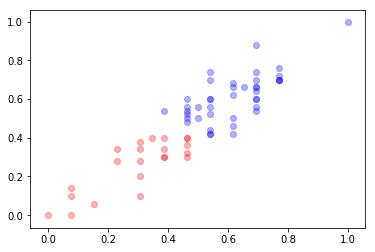

In [15]:
# plot data for x and y coordinates of the two clusters
plt.close('All')
f, scatter_map = plt.subplots(1, 1)
# the clusters are given different colors to make it easier to visualize
scatter_map.scatter(dicPlot1['X'], dicPlot1['Y'], alpha=0.3, color='r')
scatter_map.scatter(dicPlot2['X'], dicPlot2['Y'], alpha=0.3, color='b')
# the means are not plotted as they represent normalized data
# map.scatter(dicMeans['X'], dicMeans['Y'], alpha=1, color='black')
plt.show(scatter_map)

From the plot, it is clear that the two clusters are centered around low and high values from shoe size and height. This supports the argument that the two attributes are correlated. Further, from the visualization it can be seen that the two attributes seem to have a linear relationship. 

## Step 3: Aprori Algorithm

To start the Aprori Algorithm, it is first required that you define the treshold for how many times a programming languages must appear in our questionaire (transactions) in order to be considered frequent. 

In [16]:
# to determine the threshold we use the collection counter to get an overview of how often the languages appear
lan_lst = list(df['Programming Language'])

new_count_lst = []
new_lan_lst = []
for lan in lan_lst:
    lan = lan.lower()
    lan = lan.replace("," , "")
    lan = lan.replace("." , "")
    lan = lan.replace(";" , "")
    lan = lan.split(" ")
    new_lan_lst.append(lan)
    for x in range(0,len(lan)):
        new_count_lst.append(lan[x])
        
Counter(new_count_lst)

Counter({'': 4,
         'android': 2,
         'arduino': 2,
         'bash': 1,
         'batch': 1,
         'c': 15,
         'c#': 27,
         'c##': 1,
         'c#javaf#': 1,
         'c++': 21,
         'css': 4,
         'erlang': 1,
         'f#': 12,
         'gml': 1,
         'golang': 1,
         'haskell': 2,
         'haxe': 1,
         'html': 5,
         'html5': 1,
         'java': 59,
         'javac++pythonc#': 1,
         'javascript': 19,
         'js': 1,
         'jvascript': 1,
         'kotlin': 1,
         'lua': 2,
         'matlab': 2,
         'pascal': 2,
         'php': 7,
         'powershell': 1,
         'processing': 2,
         'prolog': 1,
         'puredata': 1,
         'python': 21,
         'r': 2,
         'ruby': 1,
         'scala': 5,
         'sql': 4,
         'swift': 1,
         'vb': 1,
         'vba': 2,
         'vbnet': 1})

based upon this counter, the treshold for support is set to 19. After this screening, the languages are 
c#, c++, java, javascript and python
the next step is to generate a list of all pairs of the frequent items:

In [17]:
first_fqr_set = ['c#', 'c++', 'java', 'javascript', 'python']
# total number of permutations of two items 
print "total number of combinations: ",((math.factorial(5))/(math.factorial(3)*math.factorial(2))) 

total number of combinations:  10.0


In [18]:
# calculating the possible combinations for sets of two
second_fqr_set = [set for set in itertools.combinations(first_fqr_set, 2) ]
# converting from tuples to list:
programming_lst = [(lan) for lan in new_lan_lst]
# converting from tuples to list:
second_fqr_tpl = [tuple(fqr) for fqr in second_fqr_set]

In [19]:
# calculate the frequency of the sets of two
for two_tpl in second_fqr_tpl:
    counter = 0
    for student in new_lan_lst:
        # Test whether every element is in the other
        if frozenset(two_tpl).intersection(student) == frozenset(two_tpl):
            counter += 1
        #print student
    print two_tpl , "appears: ", counter

('c#', 'c++') appears:  18
('c#', 'java') appears:  26
('c#', 'javascript') appears:  12
('c#', 'python') appears:  13
('c++', 'java') appears:  20
('c++', 'javascript') appears:  9
('c++', 'python') appears:  9
('java', 'javascript') appears:  18
('java', 'python') appears:  19
('javascript', 'python') appears:  10


In [20]:
#same procedure as before but with sets of three
second_fqr_set = ['c#', 'c++', 'java', 'python']
third_fqr_set = [set for set in itertools.combinations(second_fqr_set, 3) ]
# converting from tuples to list:
programming_lst = [(lan) for lan in new_lan_lst]
# converting from tuples to list:
third_fqr_tpl = [tuple(fqr) for fqr in third_fqr_set]

In [21]:
# calculate the frequency of the sets of three
for three_tpl in third_fqr_tpl:
    counter = 0
    for student in new_lan_lst:
        # Test whether every element in the set is in other.
        if frozenset(three_tpl).intersection(student) == frozenset(three_tpl):
            counter += 1
        #print student
    print three_tpl , "appears: ", counter

('c#', 'c++', 'java') appears:  17
('c#', 'c++', 'python') appears:  8
('c#', 'java', 'python') appears:  12
('c++', 'java', 'python') appears:  8


As seen from the results there are no frequents sets of three. That said, the set ('c#', 'c++', 'java') is really close.

## Step 4: Decision Tree

The decision tree will be applied to determine the best questions to ask in order to predict if a student is female 

In [22]:
# build the data structure for the decision tree
attribute_list = ["Age", "Shoe Size", "Height", 
                 "Favorite Mobile OS"]

# prepares data for the decision tree. All attributes for each observations are saved inside a dictionary stored
# inside a tuple that contains a boolean value: False for men and True for women

inputs = []
for obs in range (0,len(df)):
    tmp_dic = {}
    with_bool = []
    for attr in attribute_list:
        tmp_dic[attr] = list(df[attr])[obs]
    
    # appends True or False at the end of the tuple depending on the gender
    if list(df['Gender'])[obs] == "male":
        with_bool = tmp_dic, False
    else:
        with_bool = tmp_dic, True
    inputs.append(with_bool)  

In [23]:
def partition_by(inputs, attribute):
    # each input is a pair of attributes and values
    groups = defaultdict(list)
    for input in inputs:
        key = input[0][attribute]
        groups[key].append(input) 
    return groups

In [24]:
# calculates the entropy corresponding to the inputs
def partition_entropy_by(inputs, attribute):
    partitions = partition_by(inputs, attribute)
    return partition_entropy(partitions.values())

# finds the entropy from this partition of data into subsets 
def partition_entropy(subsets):
    total_count = sum(len(subset) for subset in subsets)
    return sum( data_entropy(subset) * len(subset) / total_count 
               for subset in subsets )

# calculates the entropy of a list of class probabilities 
def entropy(class_probabilities):
    return sum(-p * math.log(p, 2)
        for p in class_probabilities
        if p) # ignore zero probabilities


# calculates the possible probabilities for each label
def class_probabilities(labels): 
    total_count = len(labels) 
    return [count / total_count
        for count in Counter(labels).values()]

# calculates the entropy for each label
def data_entropy(labeled_data):
    labels = [label for _, label in labeled_data]
    probabilities = class_probabilities(labels) 
    return entropy(probabilities)

In [25]:
for key in attribute_list: 
    print key, partition_entropy_by(inputs, key)

Age 0.430330486514
Shoe Size 0.0770595709885
Height 0.107220436542
Favorite Mobile OS 0.549046207788


From the entropy levels of each attributes, Shoe Size has the lowest entropy for the first split
For Shoe Size > 40 all values are False (men)
Therefore we want to determine what the best split is when Shoe Size is <= 40

In [26]:
# shoe size is now predetermined
shoe_size_input = [(input, label)
    for input, label in inputs if input["Shoe Size"] <= 40]

for key in ["Age", "Height", 'Favorite Mobile OS']:
    print key, partition_entropy_by(shoe_size_input, key)

Age 0.39624062518
Height 0.333333333333
Favorite Mobile OS 0.8042903712


For height > 172cm all values are False (men)
Therefore we want to determine what the best split is when Height is =< 172 

In [27]:
# both shoe size and height are now predetermined
shoe_size_height_input = [(input, label)
    for input, label in inputs if input["Shoe Size"] <= 40 and input["Height"] <= 172 ] 

for key in ["Age", 'Favorite Mobile OS']:
    print key, partition_entropy_by(shoe_size_height_input, key)

Age 0.181818181818
Favorite Mobile OS 0.682706818575


for age > 25 all values are True (female)
Therefore we want to determine what the best split is when Age is =< 25 

In [28]:
# shoe size, height and age are now predetermined
shoe_size_height_age_input = [(input, label)
    for input, label in inputs if input["Shoe Size"] <= 40 and input["Height"] <= 172 and input["Age"] <= 25] 

for key in ['Favorite Mobile OS']:
    print key, partition_entropy_by(shoe_size_height_age_input, key)

Favorite Mobile OS 0.801377210634


To conclude: For all given scenarios it is not possible to make a split given our input variables that determines if it the student is a female student. 